In [1]:
import pandas as pd
import matplotlib.pyplot as plt

1. (0.5 pt.) Caricare in un dataframe le informazioni presenti nel foglio ‘customers’ del file BikeStores
presenta al link

In [2]:
df = pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true', sheet_name = 'customers' )
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0


2. (1 pt.) Visualizzare i nominativi dei clienti di cui non si conosce né il numero di telefono né la mail

In [3]:
df[df['phone'].isnull() & df['email'].isnull()][['first_name', 'last_name']]

,first_name,last_name
180,Olevia,Pitts
184,Morton,Lee
238,Felice,Guzman
239,Le,Deleon


3. (1 pt.) Visualizzare l’indirizzo dei clienti che usano gmail come propria mail personale

In [4]:
df[df['email'].str.contains('@gmail')== True][['email']]

,email
9,pamelia.newman@gmail.com
14,linnie.branch@gmail.com
20,tobie.little@gmail.com
21,adelle.larsen@gmail.com
24,regenia.vaughan@gmail.com
...,...
1428,lorrie.justice@gmail.com
1441,cassie.cline@gmail.com
1442,lezlie.lamb@gmail.com
1443,ivette.estes@gmail.com


4. (0.5 pt.) Eliminare la colonna customer_id dal dataframe

In [5]:
df.drop(columns='customer_id', inplace=True)
df

,first_name,last_name,phone,email,street,city,state,zip_code
0,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...
1440,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0


In [6]:
df1 = df.groupby('state', as_index=False)[['first_name']].count()
df1

,state,first_name
0,CA,284
1,NY,1019
2,TX,142


5. (1.5 pt) Calcolare il numero di clienti per ogni stato e visualizzare queste informazioni in un pie chart.
Dare un nome appropriato al titolo del grafico

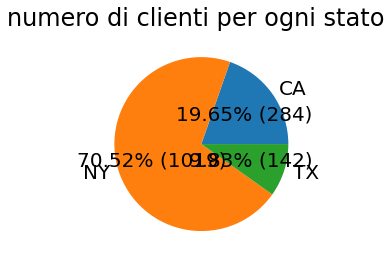

In [7]:

fig = plt.figure()
ax = plt.axes()

def make_autopct(values):
  def my_autopct(pct):
    total=sum(values)
    val = int(round(pct*total/100.0))
    return '{p:.2f}% ({v:d})'.format(p=pct, v=val)
  return my_autopct

values = list(df1['first_name'])
plt.rcParams.update({'font.size' : 20})
fig.suptitle('numero di clienti per ogni stato')
ax.pie(df1['first_name'], labels=df1['state'], autopct= make_autopct(values))
plt.show()

In [8]:
df2 = df.groupby('city', as_index=False)[['first_name']].count().sort_values('first_name',ascending=False)
df2

,city,first_name
102,Mount Vernon,20
12,Ballston Spa,17
159,Scarsdale,17
23,Canandaigua,14
118,Ossining,13
...,...,...
49,Far Rockaway,2
173,Tonawanda,1
99,Middle Village,1
188,Westbury,1


6. (1.5 pt) Calcolare il numero di clienti di ogni città. Visualizzare il nome della città e il numero di clienti
che risiedono in quella città. Ordinare in ordine decrescente sul numero di clienti e visualizzare le
informazioni in un grafico a barre orizzontali. Dare un nome appropriato al titolo del grafico e agli assi

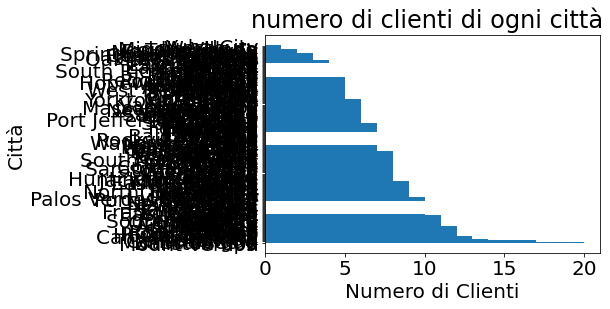

In [9]:
fig = plt.figure()
ax = plt.axes()

fig.suptitle('numero di clienti di ogni città')
ax.set_xlabel('Numero di Clienti')
ax.set_ylabel('Città')
ax.barh(df2['city'], df2['first_name'])
plt.show()

7. (1 pt.) Visualizzare le città che hanno un numero di clienti compreso tra 10 e 20. Visualizzare il nome
della città e il numero di clienti.

In [10]:
df2[(df2['first_name'] >10) & df2['first_name'] <20][['city', 'first_name']]

,city,first_name
102,Mount Vernon,20
12,Ballston Spa,17
159,Scarsdale,17
23,Canandaigua,14
118,Ossining,13
...,...,...
49,Far Rockaway,2
173,Tonawanda,1
99,Middle Village,1
188,Westbury,1


8. (1 pt.) Calcolare il numero di città per ogni stato. Visualizzare il nome dello stato e il numero delle
città

In [12]:
df3 = df.groupby('state', as_index=False)[['city']].count()
df3

,state,city
0,CA,284
1,NY,1019
2,TX,142


9. (1 pt.) Eliminare dal dataframe tutti i clienti di Buffalo di cui non si conosce il telefono

In [ ]:
df4 = df.drop(df['city']=='Buffalo', )